# Assignment LSG

For this assignment, we will familiarize ourselves more with training neural networks using `keras`. As our dataset, we use the **fashion MNIST** data. This is a data set of pictures of clothes and the goal is to label the clothes using one of 10 labels. You can read more about the data [here](https://keras.io/api/datasets/fashion_mnist/#load_data-function).

Let's begin by loading the data.

In [99]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import roc_curve, auc
%matplotlib inline

Print 5 random normal images

Print 5 random pneumonia images

In [103]:
folder='\\train'

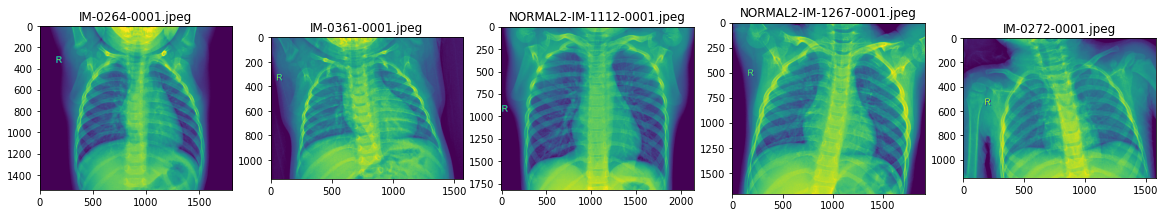

In [104]:
plt.figure(figsize=(20,20))
test_folder=r'data\chest_xray'+folder+r'\NORMAL'
for i in range(5):
    file = np.random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

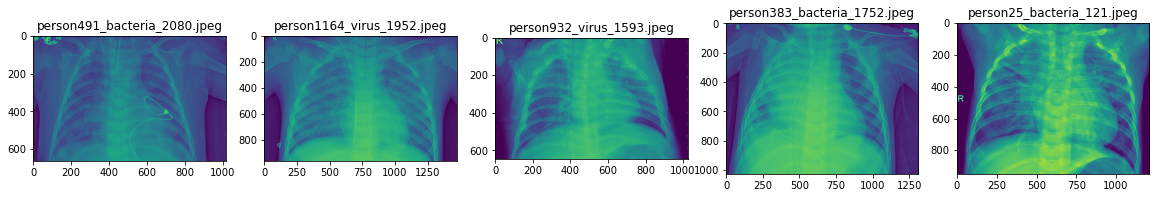

In [105]:
plt.figure(figsize=(20,20))
test_folder=r'data\chest_xray'+folder+r'\PNEUMONIA'
for i in range(5):
    file = np.random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [106]:
batch_size = 32
img_height = 180
img_width = 180
img_folder='data\chest_xray'+folder
print(img_folder)

data\chest_xray\train


In [107]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  img_folder,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [108]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  img_folder,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [109]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


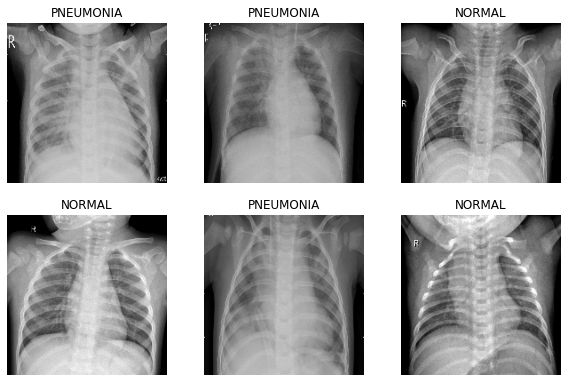

In [110]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [111]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [112]:
num_classes = 2

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [311]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [312]:
epochs=10
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 75s 573ms/step - loss: 0.5310 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.4918 - val_sparse_categorical_accuracy: 0.9559
Epoch 2/10
131/131 [==============================] - 78s 599ms/step - loss: 0.6737 - sparse_categorical_accuracy: 0.7580 - val_loss: 0.6925 - val_sparse_categorical_accuracy: 0.7795
Epoch 3/10
131/131 [==============================] - 80s 613ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.7350 - val_loss: 0.6925 - val_sparse_categorical_accuracy: 0.7795
Epoch 4/10
131/131 [==============================] - 81s 618ms/step - loss: 0.6930 - sparse_categorical_accuracy: 0.7350 - val_loss: 0.6925 - val_sparse_categorical_accuracy: 0.7795
Epoch 5/10
131/131 [==============================] - 85s 648ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.7352 - val_loss: 0.6925 - val_sparse_categorical_accuracy: 0.7795
Epoch 6/10
131/131 [==============================] - 80s 610ms/step - loss: 0.6928 -

<AxesSubplot:>

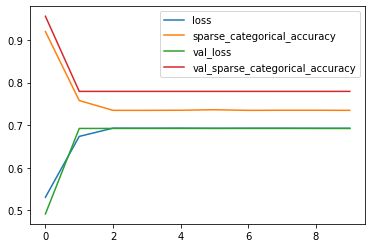

In [313]:
his=pd.DataFrame(history.history)
his.plot()

In [317]:
history.history['sparse_categorical_accuracy']

[0.9199616312980652,
 0.7579678893089294,
 0.7349628806114197,
 0.7349628806114197,
 0.7352024912834167,
 0.7364006638526917,
 0.7349628806114197,
 0.7352024912834167,
 0.7352024912834167,
 0.7349628806114197]

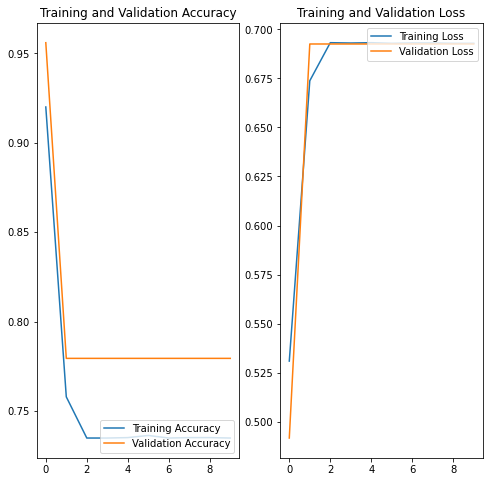

In [319]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [320]:
img = keras.preprocessing.image.load_img(
     r'data\chest_xray\test\NORMAL\IM-0001-0001.jpeg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to PNEUMONIA with a 100.00 percent confidence.


In [322]:
def predict(path):
    img = keras.preprocessing.image.load_img(
     path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    return(class_names[np.argmax(score)])

In [323]:
norm=os.listdir(r'data\chest_xray\test\NORMAL')
del norm[0]
pneum=os.listdir(r'data\chest_xray\test\PNEUMONIA')
del pneum[0]
pneum[:5]
tot=norm+pneum

In [324]:
results=pd.DataFrame(columns=['Path','Image No','Actual','Predicted'])
results['Image No']=tot
results.loc[results['Image No'].str.contains("IM"),['Actual']]=r'\NORMAL'
results.loc[results['Image No'].str.contains("person"),['Actual']]=r'\PNEUMONIA'
results['Path']=r'data\chest_xray\test'+results['Actual']+r"\\"+results['Image No']
results.head()

,Path,Image No,Actual,Predicted
0,data\chest_xray\test\NORMAL\\IM-0003-0001.jpeg,IM-0003-0001.jpeg,\NORMAL,NaN
1,data\chest_xray\test\NORMAL\\IM-0005-0001.jpeg,IM-0005-0001.jpeg,\NORMAL,NaN
2,data\chest_xray\test\NORMAL\\IM-0006-0001.jpeg,IM-0006-0001.jpeg,\NORMAL,NaN
3,data\chest_xray\test\NORMAL\\IM-0007-0001.jpeg,IM-0007-0001.jpeg,\NORMAL,NaN
4,data\chest_xray\test\NORMAL\\IM-0009-0001.jpeg,IM-0009-0001.jpeg,\NORMAL,NaN


In [325]:
results['Predicted']=results['Path'].apply(lambda x: predict(x))
results['Prob']=results['Path'].apply(lambda x: predict(x))

In [326]:
results.head()

,Path,Image No,Actual,Predicted,Prob
0,data\chest_xray\test\NORMAL\\IM-0003-0001.jpeg,IM-0003-0001.jpeg,\NORMAL,PNEUMONIA,PNEUMONIA
1,data\chest_xray\test\NORMAL\\IM-0005-0001.jpeg,IM-0005-0001.jpeg,\NORMAL,PNEUMONIA,PNEUMONIA
2,data\chest_xray\test\NORMAL\\IM-0006-0001.jpeg,IM-0006-0001.jpeg,\NORMAL,PNEUMONIA,PNEUMONIA
3,data\chest_xray\test\NORMAL\\IM-0007-0001.jpeg,IM-0007-0001.jpeg,\NORMAL,PNEUMONIA,PNEUMONIA
4,data\chest_xray\test\NORMAL\\IM-0009-0001.jpeg,IM-0009-0001.jpeg,\NORMAL,PNEUMONIA,PNEUMONIA
